In [113]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings                                
warnings.filterwarnings('ignore')

In [114]:
#reading data set and converting string date column into datetime
df = pd.read_csv('../../Data-Sets/female_birth_ts.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [115]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


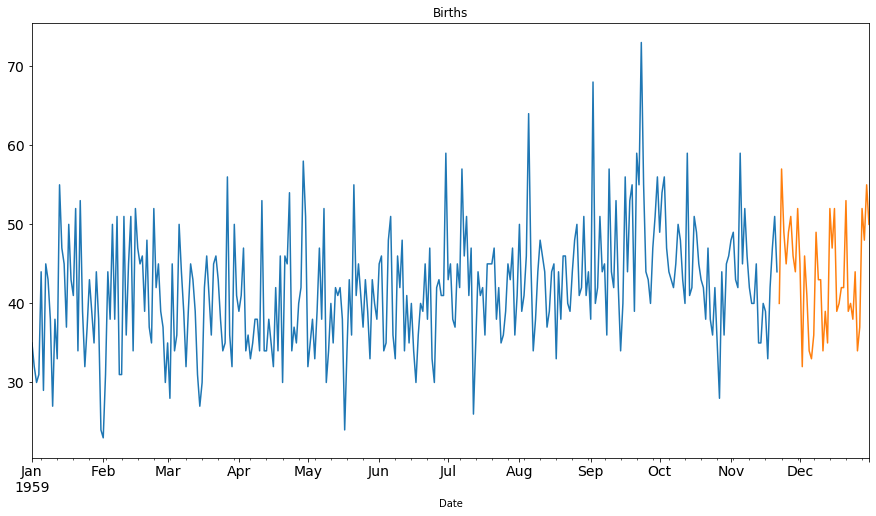

In [116]:
##train-testsplit
train=df[0:325].copy()
train.Births=train.Births.astype('double')
test=df[325:].copy()
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
plt.show()

### __Naive Method__

In [117]:
#last value of the dataframe
print('Last day of train data set:',train.Births.iloc[-1])
test['yhat_naive'] = train.Births.iloc[-1]
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_naive)))
print('mse:',mean_absolute_error(test.Births, test.yhat_naive))

Last day of train data set: 44.0
rmse: 6.631364867054142
mse: 5.625


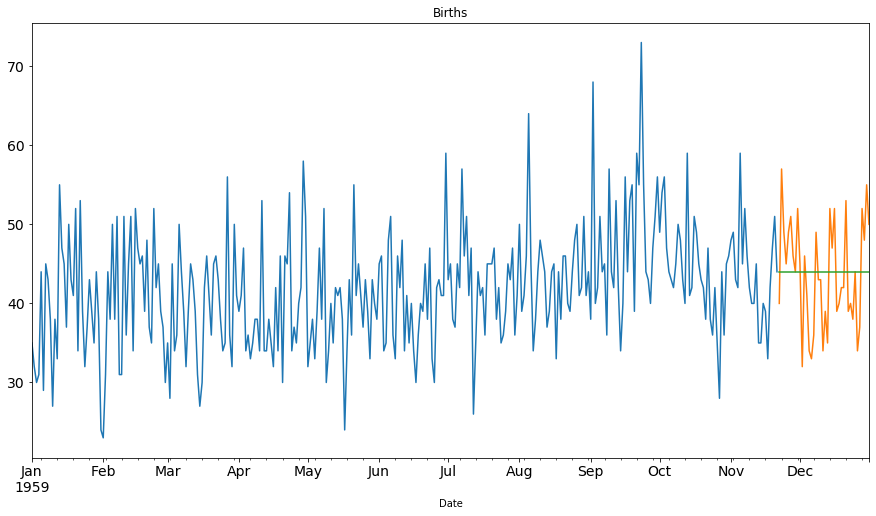

In [118]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_naive.plot(figsize=(15,8), title= 'Births', fontsize=14)
plt.show()

### __Simple Average__

In [119]:
#calculating the average of the data set
print('Average of the train data set:',round(train.Births.mean()))
test['yhat_simple_average'] = round(train.Births.mean())
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_simple_average)))
print('mse:',mean_absolute_error(test.Births, test.yhat_simple_average))

Average of the train data set: 42
rmse: 6.831910420958401
mse: 5.725


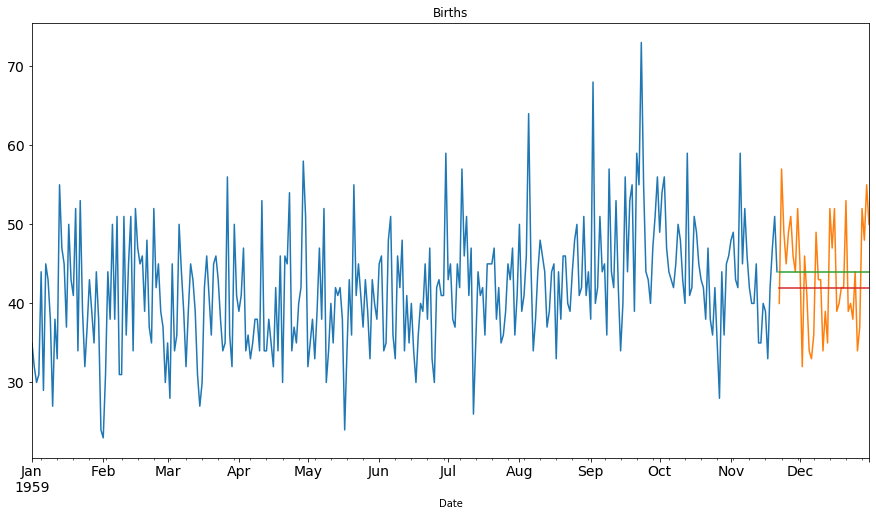

In [120]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_naive.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_simple_average.plot(figsize=(15,8), title= 'Births', fontsize=14)
plt.show()

### __Moving Average Method__

In [121]:
def rolling_mean(series=None, window=None):
    #calculating rolling mean and visualising with the original series

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

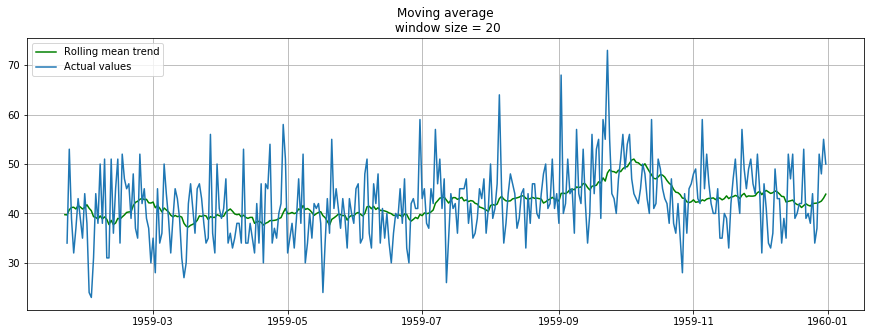

In [122]:
rolling_mean(df,20)

In [123]:
print('Rolling mean of the last n day train data set:',train.Births.rolling(window=5).mean().iloc[-1])
test['yhat_moving_average'] = train.Births.rolling(window=5).mean().iloc[-1]
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_moving_average)))
print('mse:',mean_absolute_error(test.Births, test.yhat_moving_average))

Rolling mean of the last n day train data set: 43.4
rmse: 6.629102503355941
mse: 5.625


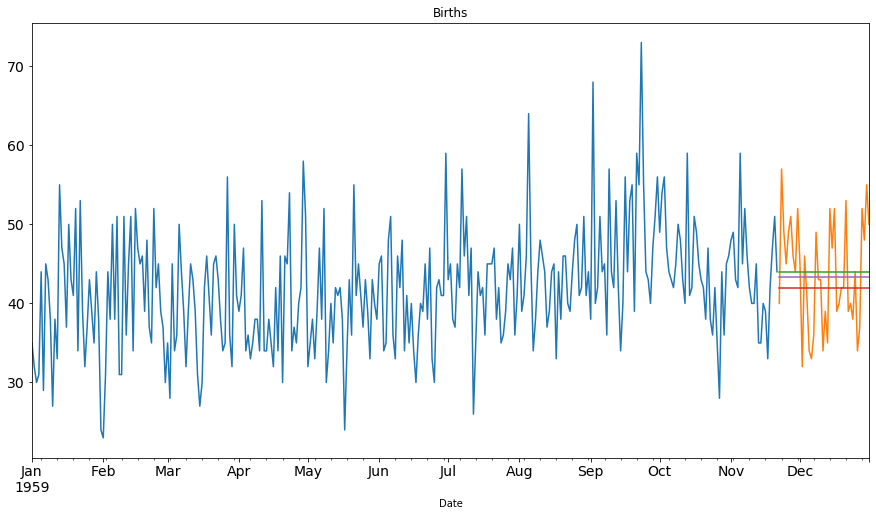

In [124]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_naive.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_simple_average.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_moving_average.plot(figsize=(15,8), title= 'Births', fontsize=14)
plt.show()

### __Decomposition__

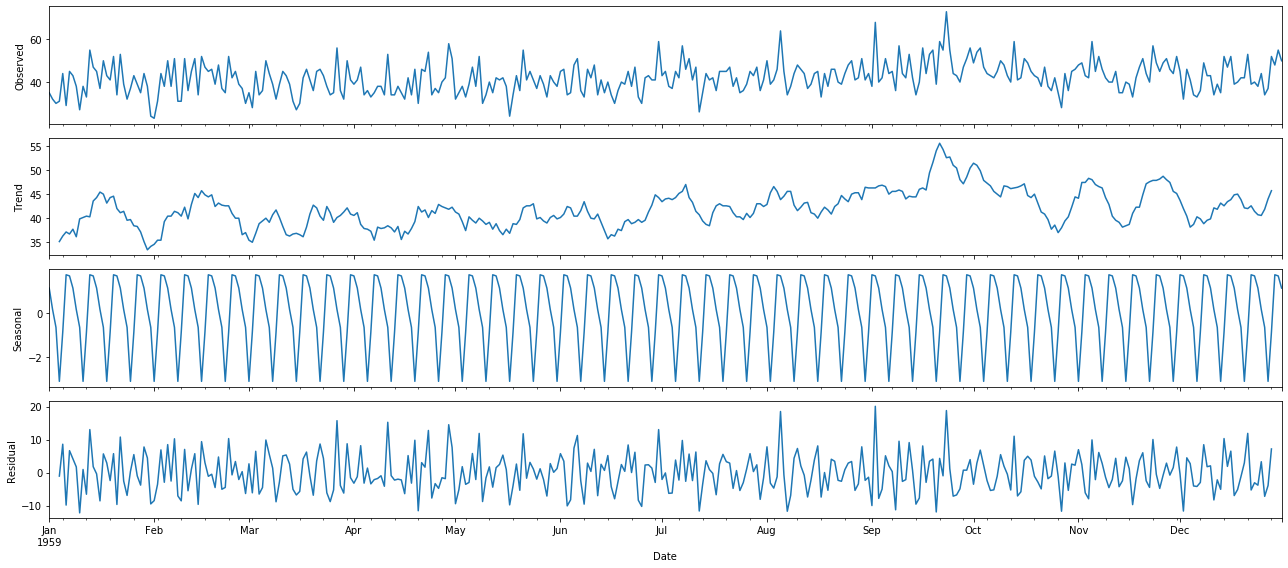

In [125]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df.Births, model='additive')
fig = decomposition.plot()
plt.show()

## __Explonential Smoothing__

### __Simple Explonential Smoothing__

In [149]:
ses = SimpleExpSmoothing(train.Births).fit()
print('Explonential smoothing with optimised alpha:',ses.forecast(1).iloc[0])
test['yhat_simple_explonential_smoothing'] = ses.forecast(1).iloc[0]
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_simple_explonential_smoothing)))
print('mse:',mean_absolute_error(test.Births, test.yhat_simple_explonential_smoothing))

Explonential smoothing with optimised alpha: 43.26033854320109
rmse: 6.6363633959989405
mse: 5.625


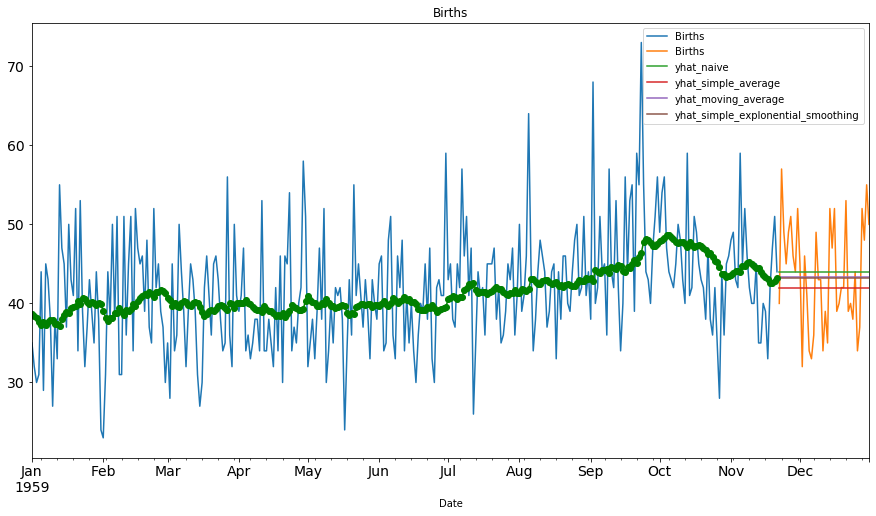

In [145]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.yhat_naive.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.yhat_simple_average.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.yhat_moving_average.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.yhat_simple_explonential_smoothing.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
ses.fittedvalues.plot(marker='o', color='green')
plt.show()

### __Holt's Linear Trend__

In [162]:
holt_ = Holt(train.Births)
test['yhat_holts_linear_trend'] = holt_.fit().forecast(len(test))
print(test['yhat_holts_linear_trend'].head())
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_holts_linear_trend)))
print('mse:',mean_absolute_error(test.Births, test.yhat_holts_linear_trend))

Date
1959-11-22    43.796683
1959-11-23    43.812965
1959-11-24    43.829246
1959-11-25    43.845528
1959-11-26    43.861809
Name: yhat_holts_linear_trend, dtype: float64
rmse: 6.650185813578663
mse: 5.671819193684614


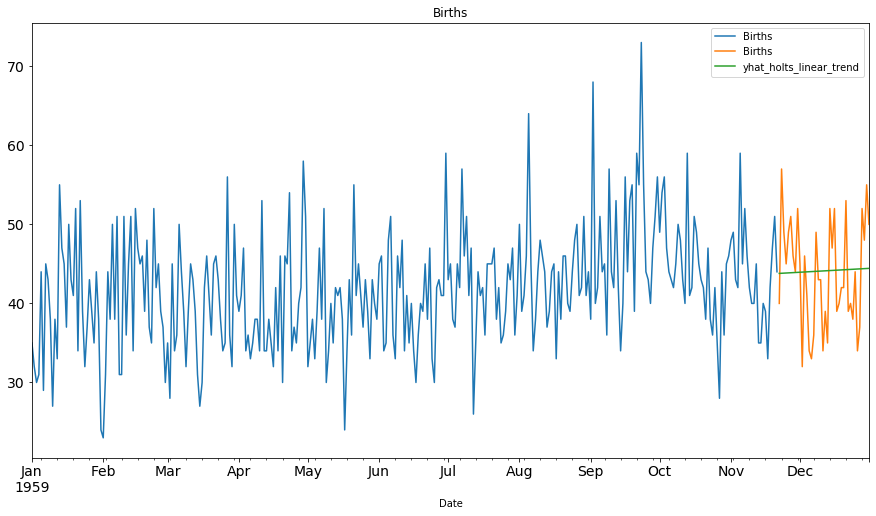

In [158]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.yhat_holts_linear_trend.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
plt.show()